# Genetic algorithm to find 10 integers between 0 and 100 whose sum is = 900



**Imports**

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

## **Class Individual**

### Our individuals will be made up of 10 initially random integers between 0 and 100. 
### The goal will be to get the sum of those 10 numbers to equal 900, and that’ll be the measure of how fit an individual is.

In [0]:
class Individual(object):

    def __init__(self, numbers=None, mutate_prob=0.01):
        if numbers is None:
            self.numbers = np.random.randint(101, size=10)
        else:
            self.numbers = numbers
            # Mutate
            if mutate_prob > np.random.rand():
                mutate_index = np.random.randint(len(self.numbers) - 1)
                self.numbers[mutate_index] = np.random.randint(101)

    def fitness(self):
        """
            Returns fitness of individual
            Fitness is the absolute difference between 900 and the sum of the individuals
        """
        target_sum = 900
        return abs(target_sum - np.sum(self.numbers))

## Class population
### Populations are made up of individuals. 
### We’ll initialize a population with a population size of 100 individuals
### Each individual will be randomly initalized. Then we’ll evolve the population to find an optimal solution.

In [0]:
class Population(object):

    def __init__(self, pop_size=10, mutate_prob=0.01, retain=0.2, random_retain=0.03):
        """
            Args
                pop_size: size of population
                fitness_goal: goal that population will be graded against
        """
        self.pop_size = pop_size
        self.mutate_prob = mutate_prob
        self.retain = retain
        self.random_retain = random_retain
        self.fitness_history = []
        self.parents = []
        self.done = False

        # Create individuals
        self.individuals = []
        for x in range(pop_size):
            self.individuals.append(Individual(numbers=None,mutate_prob=self.mutate_prob))

    def grade(self, generation=None):
        """
            Grade the generation by getting the average fitness of its individuals
        """
        fitness_sum = 0
        for x in self.individuals:
            fitness_sum += x.fitness()

        pop_fitness = fitness_sum / self.pop_size
        self.fitness_history.append(pop_fitness)

        # Set Done flag if we hit target
        if int(round(pop_fitness)) == 0:
            self.done = True

        if generation is not None:
            if generation % 5 == 0:
                print("Episode",generation,"Population fitness:", pop_fitness)

    def select_parents(self):
        """
            Select the fittest individuals to be the parents of next generation (lower fitness it better in this case)
            Also select a some random non-fittest individuals to help get us out of local maximums
        """
        # Sort individuals by fitness (we use reversed because in this case lower fintess is better)
        self.individuals = list(reversed(sorted(self.individuals, key=lambda x: x.fitness(), reverse=True)))
        # Keep the fittest as parents for next gen
        retain_length = self.retain * len(self.individuals)
        self.parents = self.individuals[:int(retain_length)]

        # Randomly select some from unfittest and add to parents array
        unfittest = self.individuals[int(retain_length):]
        for unfit in unfittest:
            if self.random_retain > np.random.rand():
                self.parents.append(unfit)

    def breed(self):
        """
            Crossover the parents to generate children and new generation of individuals
        """
        target_children_size = self.pop_size - len(self.parents)
        children = []
        if len(self.parents) > 0:
            while len(children) < target_children_size:
                father = random.choice(self.parents)
                mother = random.choice(self.parents)
                if father != mother:
                    child_numbers = [ random.choice(pixel_pair) for pixel_pair in zip(father.numbers, mother.numbers)]
                    child = Individual(child_numbers)
                    children.append(child)
            self.individuals = self.parents + children

    def evolve(self):
        # 1. Select fittest
        self.select_parents()
        # 2. Create children and new generation
        self.breed()
        # 3. Reset parents and children
        self.parents = []
        self.children = []

## Here are the basic steps for the evolution:

### *   Select the fittest (sum is closest to 900) individuals to be the parents of the next generation. In this case a fitness of 0 will be the best because fitness is abs(900 — sum(individual.numbers))

### *   We’ll randomly select some of the non-fittest individuals to be parents as well. This increases our chance of finding a global optimum.

### *   Then we’ll breed or crossover the selected parents, creating new individuals, that we’ll call the children . Instead of randomly initializing the children, we’ll base them on the parents. When creating children, there’ll be a chance that the child will have a randommutatation of it’s numbers.

### *   The parents and the children will form part of the next generation. Calculate the average population fitness. Repeat.

### *   When we hit an average population fitness of 0 (or close to it) we’ll stop evolving. Normally it’s more intuitive to have a higher fitness be better than a lower fitness, in our case our convention is that lower fitness is better.







Episode 0 Population fitness: 404.931
Episode 5 Population fitness: 23.497
Episode 10 Population fitness: 12.908
Episode 15 Population fitness: 13.445
Episode 20 Population fitness: 13.232
Episode 25 Population fitness: 14.0
Episode 30 Population fitness: 13.814
Episode 35 Population fitness: 13.555
Episode 40 Population fitness: 5.749
Episode 45 Population fitness: 0.808
Finished at generation: 46 , Population fitness: 0.13
Showing fitness history graph


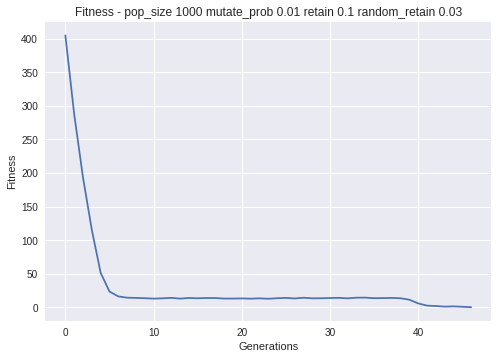

In [7]:
if __name__ == "__main__":
    pop_size = 1000
    mutate_prob = 0.01
    retain = 0.1
    random_retain = 0.03

    pop = Population(pop_size=pop_size, mutate_prob=mutate_prob, retain=retain, random_retain=random_retain)

    SHOW_PLOT = True
    GENERATIONS = 5000
    for x in range(GENERATIONS):
        pop.grade(generation=x)
        pop.evolve()

        if pop.done:
            print("Finished at generation:", x, ", Population fitness:", pop.fitness_history[-1])
            break

    # Plot fitness history
    if SHOW_PLOT:
        print("Showing fitness history graph")
       
        plt.plot(np.arange(len(pop.fitness_history)), pop.fitness_history)
        plt.ylabel('Fitness')
        plt.xlabel('Generations')
        plt.title('Fitness - pop_size {} mutate_prob {} retain {} random_retain {}'.format(pop_size, mutate_prob, retain, random_retain))
        plt.show()